## Imports

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Determining the center and radius

In [12]:
im = Image.open('image.jpg')

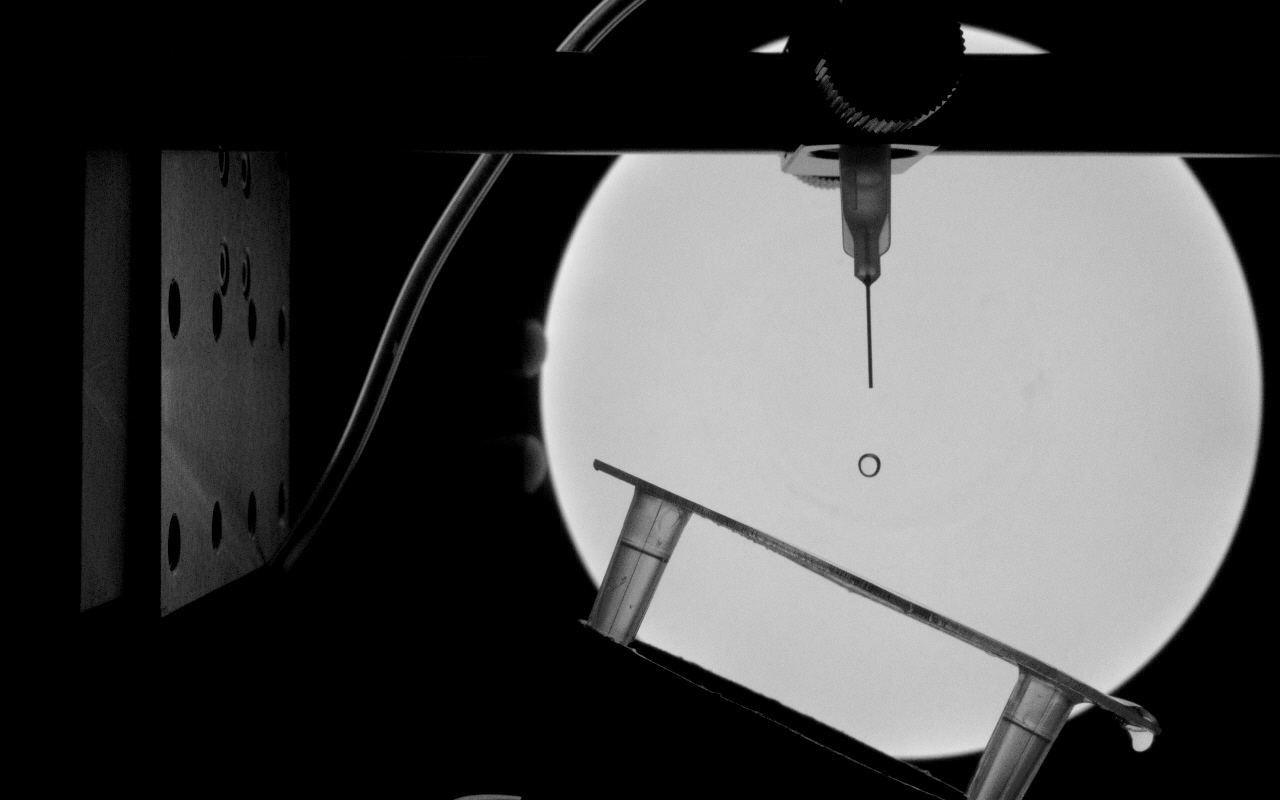

In [13]:
im

In [14]:
im.size

(1280, 800)

In [15]:
image = plt.imread('image.jpg')
type(image)

numpy.ndarray

In [16]:
image.shape

(800, 1280)

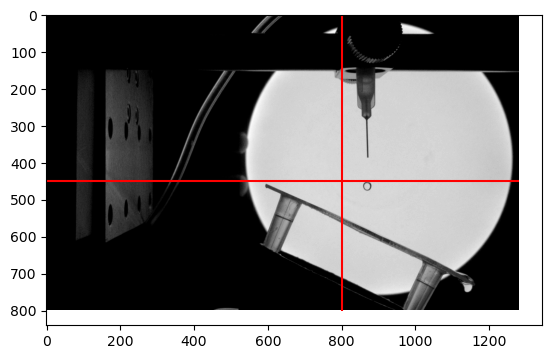

In [93]:
plt.imshow(image, cmap='gray')
plt.vlines(800, 0, image.shape[0], color='r')
plt.hlines(450, 0, image.shape[1], color='r')

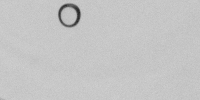

In [18]:
x0 = 800
y0 = 450
drop = im.crop((x0, y0, 1000, 550))
drop_np = np.asarray(drop)
drop

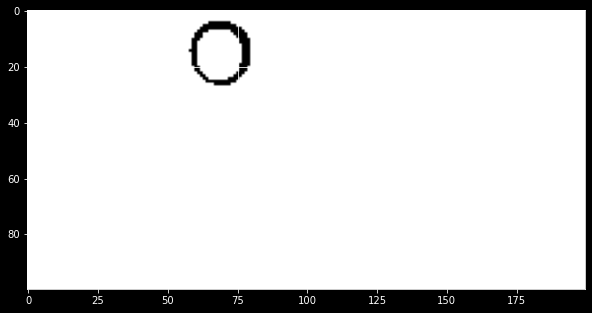

In [19]:
drop_np_f = (drop_np>110).astype(int)
plt.figure(figsize=(10,10))
plt.grid()
# plt.imshow(drop_np, cmap='gray')
plt.imshow(drop_np_f, cmap='gray')

In [37]:
skip = 1
xs = drop_np_f.argmin(axis=0)[skip:]
xss = np.nonzero(xs)
xl = skip+ xss[0][0]
xr = skip+ xss[0][-1]
xl, xr

(58, 79)

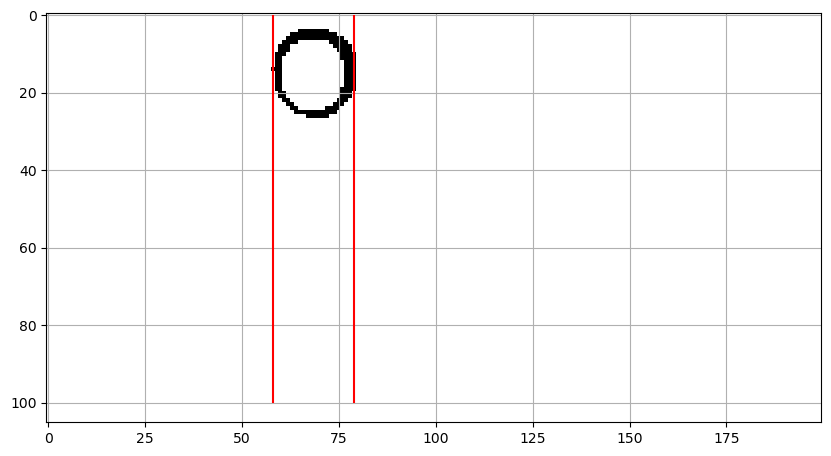

In [90]:
drop_np_f = (drop_np>110).astype(int)
plt.figure(figsize=(10,10))
plt.grid()
# plt.imshow(drop_np, cmap='gray')
plt.imshow(drop_np_f, cmap='gray')
plt.vlines(xr, 0, drop_np_f.shape[0], color='r')
plt.vlines(xl, 0, drop_np_f.shape[0], color='r')

In [38]:
skip = 1
ys = drop_np_f.argmin(axis=1)[:-skip]
yss = np.nonzero(ys)
yu = yss[0][0]
yd = yss[0][-1]
yu, yd

(4, 26)

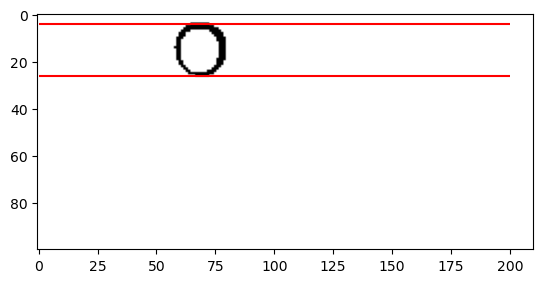

In [96]:
plt.imshow(drop_np_f, cmap='gray')
plt.hlines(yd, 0, drop_np_f.shape[1], color='r')
plt.hlines(yu, 0, drop_np_f.shape[1], color='r')

In [49]:
plt.rcdefaults()

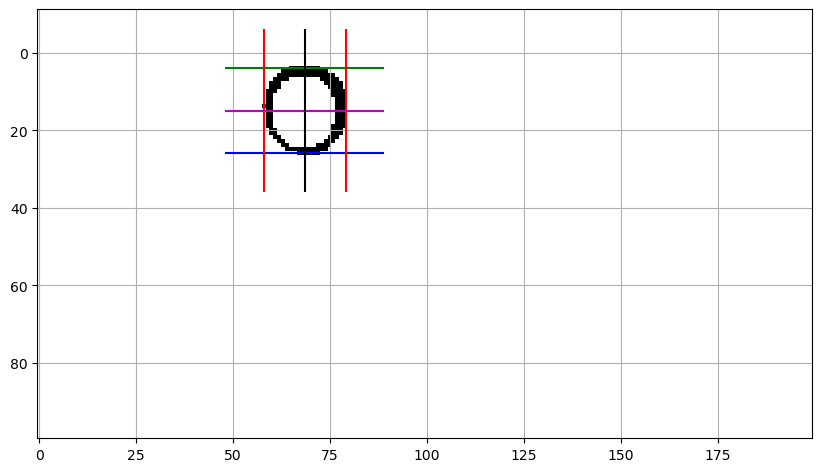

In [110]:
plt.figure(figsize=(10,10))
# plt.imshow(drop_np, cmap='gray')
plt.imshow(drop_np_f, cmap='gray')
offset = 10
plt.grid()
plt.hlines(yu, xl-offset, xr+offset, color='g')
plt.hlines(yd, xl-offset, xr+offset, color='b')
plt.vlines(xl, yu-offset, yd+offset, color='r')
plt.vlines(xr, yu-offset, yd+offset, color='r')
plt.hlines((yu+yd)/2, xl-offset, xr+offset, color='m')
plt.vlines((xl+xr)/2, yu-offset, yd+offset, color='k')

In [114]:
r1 = np.abs((xl-xr))/2
r2 = np.abs((yu-yd))/2
r = int((r1+r2)/2)
x = int(x0 + xl+r)
y = int(y0 +yu+ r)
x, y, r

(868, 464, 10)

## Final Function

In [138]:
def get_center(image_path, crop = None, skip_x = None, skip_y=None, contrast=120):
    """
    Determines the coordinates of center and the radius of the drop

    Parameters
    ----------
    image_path : str
        Path to the image
    crop : tuple, optional
        Coordinates of the crop. The default is None.
    skip : int, optional
        Number of pixels to skip. The default is None.

    Returns
    -------
    tuple
        Coordinates of the center and the radius of the drop.
    """
    im = Image.open(image_path)

    if crop is not None:
        im_c = im.crop(crop)
    im_np = np.asarray(im_c)
    im_np_f = (im_np>contrast).astype(int)
    skip_pixels_x = skip_x if skip_x is not None else 1
    #Along axis 0
    xs = im_np_f.argmin(axis=0)[skip_pixels_x:]
    xss = np.nonzero(xs)
    xl = skip_pixels_x+ xss[0][0]
    xr = skip_pixels_x+ xss[0][-1]
    #Along axis 1
    skip_pixels_y = skip_y if skip_y is not None else 1
    ys = im_np_f.argmin(axis=1)[:-skip_pixels_y]
    yss = np.nonzero(ys)
    yu = yss[0][0]
    yd = yss[0][-1]
    #Calculate center and radius
    r1 = np.abs((xl-xr))/2
    r2 = np.abs((yu-yd))/2
    r = int((r1+r2)/2)
    x = int(crop[0] + xl+ r)
    y = int(crop[1] + yu+ r)
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='gray')
    plt.hlines(y, 0, im.size[0], color='g')
    plt.vlines(x, 0, im.size[1], color='b')
    plt.annotate(f'{x,y}', xy=(x, y), xytext=(x+20, y+30),
                    # arrowprops=dict(facecolor='black', shrink=0.05),
                    )
    plt.show()
    return r, (x, y)

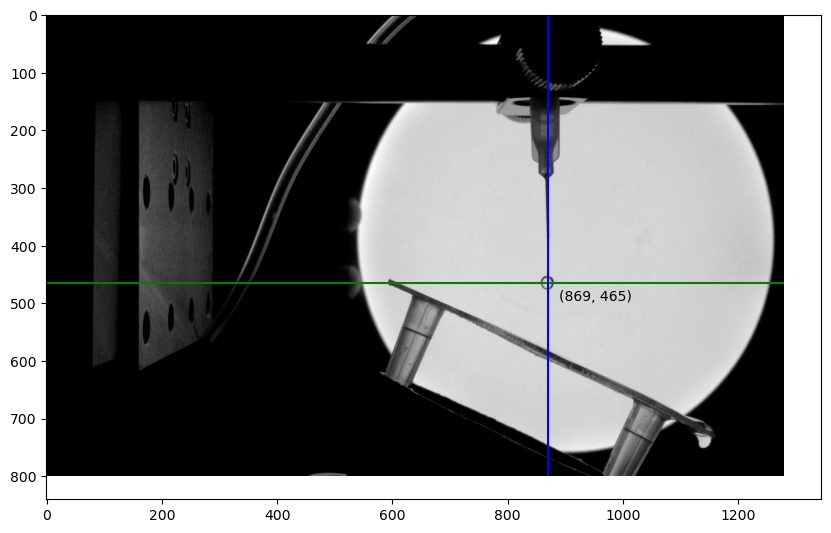

(11, (869, 465))

In [139]:
x0 = 800
y0 = 450
get_center('image.jpg', crop = (x0, y0, 1000, 550))